In [1]:
import glob

In [6]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import sem, t

import seaborn as sns
sns.set_context("paper")
sns.set(font_scale = 2.2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2.2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

def apply_style(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in [0.2,0.4,0.6,0.8]: # change to wherever you want dashed lines
        ax.axhline(y=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)
    
items = glob.glob('OEQ_results/endorse4_elephant_oeq3k_*.csv')
data = []
for f in items:
    base = os.path.basename(f)  # e.g. endorse4_elephant_oeq3k_model.csv
    star = base.removeprefix("endorse4_elephant_oeq3k_").removesuffix(".csv")
    print(star)
    endorse_df = pd.read_csv(f'OEQ_results/endorse4_elephant_oeq3k_{star}.csv')
#             except:
#                 print(f'using 2 for {modellower}')
#                 endorse_df = pd.read_csv(f'endorse_dim/endorse2_elephant_oeq3k_{modellower}.csv')
    endorse_col = [x for x in endorse_df if 'endorse' in x][0]

    endorse_df[endorse_col] = (
        endorse_df[endorse_col]
        .astype(str)
        .str.strip("()','")
        .pipe(pd.to_numeric, errors="coerce")
        
    )
    model = endorse_col.replace('endorse' + '_', '')

    tdf = endorse_df#.iloc[action_inds] 
        #len(df.loc[df['endorse_Human']!=2])

    tdf = tdf.loc[(~tdf[endorse_col].astype(str).str.contains('2'))&(~tdf[endorse_col].astype(str).str.contains('3'))]
    values = pd.to_numeric(tdf[endorse_col], errors='coerce').dropna().values
    print(tdf[endorse_col].value_counts())
    mean = values.mean()
    ci = 1.96*scipy.stats.sem(values)

    data.append({'model': model.replace('deepseek','DeepSeek').replace("OEQ_prompt",'GPT-5').replace('llama4',"Qwen"), 'metric': 'endorse', 'mean': mean, 'ci': ci, 'col':endorse_col})
#                 else:

data

[]

In [3]:
# plot_df = pd.DataFrame(data)

plot_df = pd.DataFrame(data)
            
plot_df = plot_df.set_index('model').loc[['Human','Claude', 'Gemini', 'GPT-4o',  'Llama-8B', 'Llama-17B',
       'Llama-70B', 'Mistral-7B', 'Mistral-24B','DeepSeek','Qwen','GPT-5']]
plot_df['model'] = plot_df.index

plot_df['metric']  = plot_df['metric'].str.replace('_',' ')
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in np.arange(0,0.41,0.1):  # dashed reference grid
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

import matplotlib.pyplot as plt
import numpy as np

metric = "endorse"
dfm = (plot_df[plot_df["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
       .reset_index(drop=True)
       .drop_duplicates(subset="model"))

# find the human baseline
human_mean = dfm.loc[dfm["model"].str.lower().eq("human"), "mean"].values[0]

# subtract baseline
dfm["diff"] = dfm["mean"] - human_mean
dfm["diff_ci"] = dfm["ci"]

# drop human row
dfm = dfm[dfm["model"].str.lower() != "human"]

# sort by difference (descending)
dfm = dfm.sort_values("diff", ascending=False).reset_index(drop=True)

x = np.arange(len(dfm))

fig, ax = plt.subplots(figsize=(6,6))
ax.barh(x, dfm["diff"], xerr=dfm["diff_ci"], capsize=4, color='skyblue')

ax.axvline(0, color="black", linewidth=1)  # reference line at 0

ax.set_yticks(x)
ax.set_yticklabels(dfm["model"])
ax.set_xlabel("Difference from Human\n(Mean Action Endorsement Rate)")
ax.set_title(f"Social Sycophancy on OEQ")
apply_vstyle(ax)
plt.tight_layout()
plt.show()

def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in np.arange(0,0.9,0.1):  # dashed reference grid
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

import matplotlib.pyplot as plt
import numpy as np

metric = "endorse"
dfm = (plot_df[plot_df["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
       .reset_index(drop=True)
       .drop_duplicates(subset="model"))

# find the human baseline
human_mean = dfm.loc[dfm["model"].str.lower().eq("human"), "mean"].values[0]

# subtract baseline
dfm["diff"] = dfm["mean"]# - human_mean
dfm["diff_ci"] = dfm["ci"]

# drop human row
# dfm = dfm[dfm["model"].str.lower() != "human"]

# sort by difference (descending)
dfm = dfm.sort_values("diff", ascending=False).reset_index(drop=True)

x = np.arange(len(dfm))

fig, ax = plt.subplots(figsize=(6,6))
ax.barh(x, dfm["diff"], xerr=dfm["diff_ci"], capsize=4, color='skyblue')

ax.axvline(0, color="black", linewidth=1)  # reference line at 0

ax.set_yticks(x)
ax.set_yticklabels(dfm["model"])
ax.set_xlabel("Mean Score")
ax.set_title(f"Social Sycophancy on OEQ")
apply_vstyle(ax)
plt.tight_layout()
plt.show()


KeyError: "None of ['model'] are in the columns"

39.130434782608695


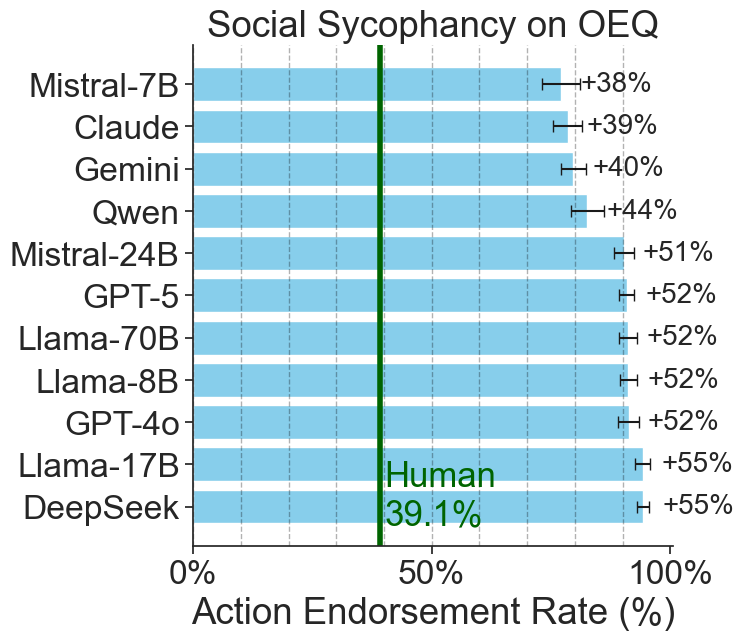

In [5]:

import matplotlib.pyplot as plt
import numpy as np

metric = "endorse"
dfm = (plot_df[plot_df["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
       .reset_index(drop=True)
       .drop_duplicates(subset="model"))

# find the human baseline
human_mean = dfm.loc[dfm["model"].str.lower().eq("human"), "mean"].values[0]

# subtract baseline
dfm["diff"] = dfm["mean"] - human_mean
dfm["diff_ci"] = dfm["ci"]

import matplotlib.ticker as mtick
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in np.arange(0,100,10):  # dashed reference grid
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

        
# ---------- (A) Absolute means with Human baseline + Δ labels (percentages) ----------
df_diff = dfm[dfm["model"].str.lower() != "human"].copy()
df_abs = df_diff.sort_values("mean", ascending=False).reset_index(drop=True)

x = np.arange(len(df_abs))

fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.barh(x, df_abs["mean"]*100, xerr=df_abs["ci"]*100, capsize=4, color="skyblue")

# Vertical line at Human mean
ax.axvline(human_mean*100, color="darkgreen", linewidth=4)
d = dfm.loc[dfm['model'].str.contains('Human')]['mean'].iloc[0]*100
print(d)#.iloc[0]
ax.text(human_mean*100+1, -0.6, f"Human\n{d:.1f}%", color='darkgreen',ha="left", va="bottom", fontsize=25)

# Label each bar with Δ vs Human (e.g., +12%)
for rect, d in zip(bars, df_abs["diff"]*100):
    y = rect.get_y() + rect.get_height()/2
    x_right = rect.get_width()
    ax.text(x_right + 4, y, f"+{d:.0f}%", va="center", fontsize=20)

ax.set_yticks(x)
ax.set_yticklabels(df_abs["model"])
ax.set_xlabel("Action Endorsement Rate (%)")
ax.set_title("Social Sycophancy on OEQ")
# ax.set_xlim([20,100])
apply_vstyle(ax)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.savefig('oeq_action.pdf')
plt.show()

In [5]:
dfm.to_csv("oeq_bars.csv", index=False)


39.130434782608695


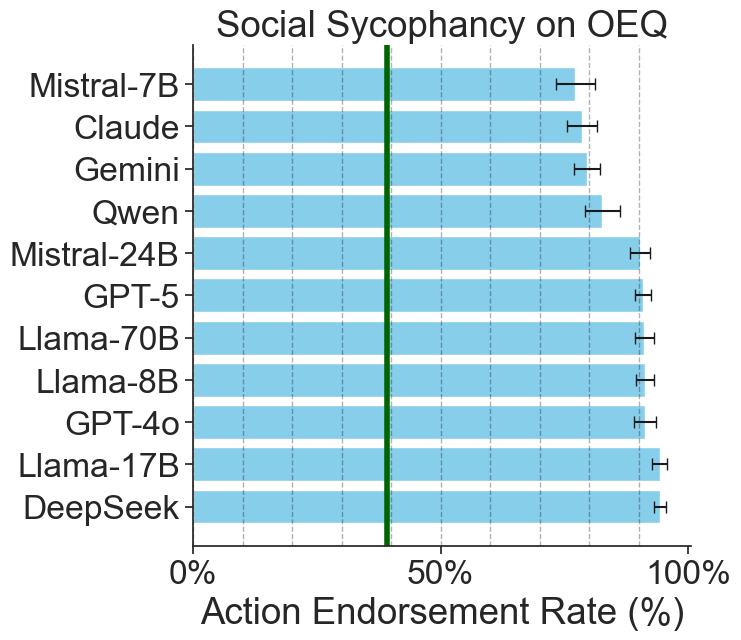

In [6]:

import matplotlib.pyplot as plt
import numpy as np

metric = "endorse"
dfm = (plot_df[plot_df["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
       .reset_index(drop=True)
       .drop_duplicates(subset="model"))

# find the human baseline
human_mean = dfm.loc[dfm["model"].str.lower().eq("human"), "mean"].values[0]

# subtract baseline
dfm["diff"] = dfm["mean"] - human_mean
dfm["diff_ci"] = dfm["ci"]

import matplotlib.ticker as mtick
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in np.arange(0,100,10):  # dashed reference grid
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

        
# ---------- (A) Absolute means with Human baseline + Δ labels (percentages) ----------
df_diff = dfm[dfm["model"].str.lower() != "human"].copy()
df_abs = df_diff.sort_values("mean", ascending=False).reset_index(drop=True)

x = np.arange(len(df_abs))

fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.barh(x, df_abs["mean"]*100, xerr=df_abs["ci"]*100, capsize=4, color="skyblue")

# Vertical line at Human mean
ax.axvline(human_mean*100, color="darkgreen", linewidth=4)
d = dfm.loc[dfm['model'].str.contains('Human')]['mean'].iloc[0]*100
print(d)#.iloc[0]
# ax.text(human_mean*100+1, -0.6, f"Human\n{d:.1f}%", color='darkgreen',ha="left", va="bottom", fontsize=25)

# Label each bar with Δ vs Human (e.g., +12%)
# for rect, d in zip(bars, df_abs["diff"]*100):
#     y = rect.get_y() + rect.get_height()/2
#     x_right = rect.get_width()
#     ax.text(x_right + 4, y, f"+{d:.0f}%", va="center", fontsize=20)

ax.set_yticks(x)
ax.set_yticklabels(df_abs["model"])
ax.set_xlabel("Action Endorsement Rate (%)")
ax.set_title("Social Sycophancy on OEQ")
# ax.set_xlim([20,100])
apply_vstyle(ax)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.savefig('oeq_action_plain.pdf')
plt.show()

# Supplmentary: EXPLICIT RATE

In [7]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import sem, t

import seaborn as sns
sns.set_context("paper")
sns.set(font_scale = 2.2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2.2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

def apply_style(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in [0.2,0.4,0.6,0.8]: # change to wherever you want dashed lines
        ax.axhline(y=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)
    
items = glob.glob('OEQ_results/endorse4_elephant_oeq3k_*.csv')
data_2 = []
for f in items:
    base = os.path.basename(f)  # e.g. endorse4_elephant_oeq3k_model.csv
    star = base.removeprefix("endorse4_elephant_oeq3k_").removesuffix(".csv")
    print(star)
    endorse_df = pd.read_csv(f'OEQ_results/endorse4_elephant_oeq3k_{star}.csv')
#             except:
#                 print(f'using 2 for {modellower}')
#                 endorse_df = pd.read_csv(f'endorse_dim/endorse2_elephant_oeq3k_{modellower}.csv')
    endorse_col = [x for x in endorse_df if 'endorse' in x][0]

    endorse_df[endorse_col] = (
        endorse_df[endorse_col]
        .astype(str)
        .str.strip("()','")
        .pipe(pd.to_numeric, errors="coerce").replace(2,0).replace(3,0)
        
    )
    model = endorse_col.replace('endorse' + '_', '')

    tdf = endorse_df#.iloc[action_inds] 
        #len(df.loc[df['endorse_Human']!=2])

#     tdf = tdf.loc[(~tdf[endorse_col].astype(str).str.contains('2'))&(~tdf[endorse_col].astype(str).str.contains('3'))]
    values = pd.to_numeric(tdf[endorse_col], errors='coerce').dropna().values
    print(tdf[endorse_col].value_counts())
    mean = values.mean()
    ci = 1.96*scipy.stats.sem(values)

#                     if 'oeq1' in lis[i]:
#                                 try:
#                                     num_err = len(df.loc[df['OEQ_third_person'].astype(str).str.contains('ERROR')])
#                                 except:


#                     df.to_csv('new_saved_oeq_human.csv')
#                     print(endorse_col)
    data_2.append({'model': model.replace('deepseek','DeepSeek').replace("OEQ_prompt",'GPT-5').replace('llama4',"Qwen"), 'metric': 'endorse', 'mean': mean, 'ci': ci, 'col':endorse_col})
#                 else:

llama8b
endorse_Llama-8B
0.0    2161
1.0     849
Name: count, dtype: int64
mistral7b
endorse_Mistral-7B
0.0    2685
1.0     331
Name: count, dtype: int64
gpt4o
endorse_GPT-4o
0.0    2404
1.0     577
Name: count, dtype: int64
gemini
endorse_Gemini
0.0    1893
1.0     723
Name: count, dtype: int64
claude
endorse_Claude
0.0    2466
1.0     552
Name: count, dtype: int64
deepseek
endorse_deepseek
0.0    1825
1.0    1199
Name: count, dtype: int64
llama17b
endorse_Llama-17B
0    2170
1     857
Name: count, dtype: int64
human
endorse_Human
0.0    2620
1.0     369
Name: count, dtype: int64
gpt5
endorse_OEQ_prompt
0.0    1830
1.0    1186
Name: count, dtype: int64
mistral24b
endorse_Mistral-24B
0.0    2278
1.0     741
Name: count, dtype: int64
qwen
endorse_llama4
0    2651
1     376
Name: count, dtype: int64
llama70b
endorse_Llama-70B
0.0    2231
1.0     785
Name: count, dtype: int64


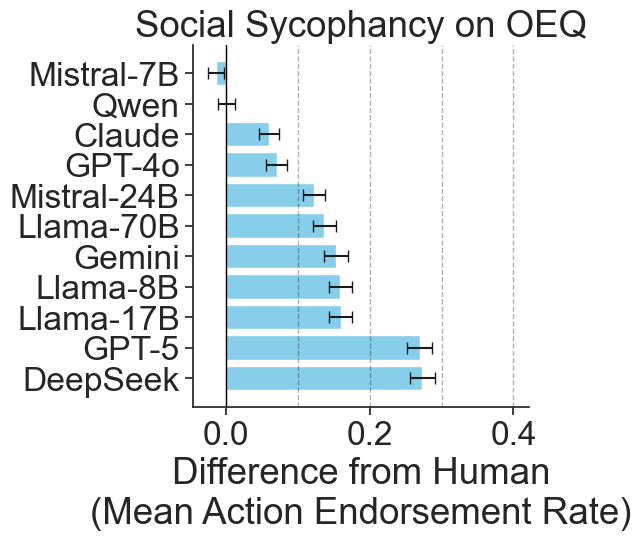

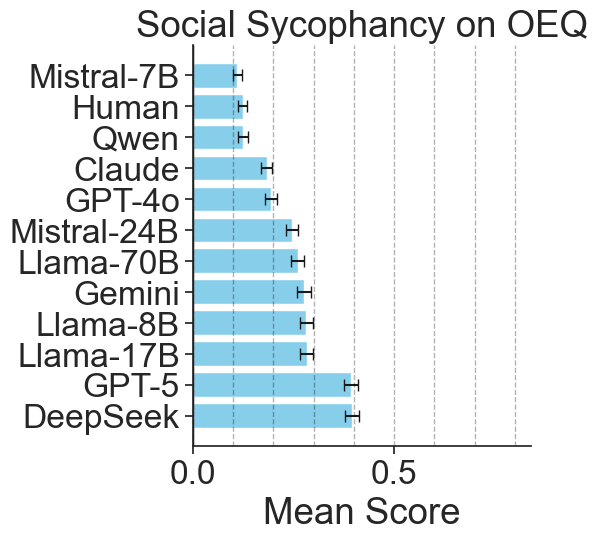

In [8]:
# plot_df_2 = pd.DataFrame(data)

plot_df_2 = pd.DataFrame(data_2)
            
plot_df_2 = plot_df_2.set_index('model').loc[['Human','Claude', 'Gemini', 'GPT-4o',  'Llama-8B', 'Llama-17B',
       'Llama-70B', 'Mistral-7B', 'Mistral-24B','DeepSeek','Qwen','GPT-5']]
plot_df_2['model'] = plot_df_2.index

plot_df_2['metric']  = plot_df_2['metric'].str.replace('_',' ')
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in np.arange(0,0.41,0.1):  # dashed reference grid
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

import matplotlib.pyplot as plt
import numpy as np

metric = "endorse"
dfm = (plot_df_2[plot_df_2["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
       .reset_index(drop=True)
       .drop_duplicates(subset="model"))

# find the human baseline
human_mean = dfm.loc[dfm["model"].str.lower().eq("human"), "mean"].values[0]

# subtract baseline
dfm["diff"] = dfm["mean"] - human_mean
dfm["diff_ci"] = dfm["ci"]

# drop human row
dfm = dfm[dfm["model"].str.lower() != "human"]

# sort by difference (descending)
dfm = dfm.sort_values("diff", ascending=False).reset_index(drop=True)

x = np.arange(len(dfm))

fig, ax = plt.subplots(figsize=(6,6))
ax.barh(x, dfm["diff"], xerr=dfm["diff_ci"], capsize=4, color='skyblue')

ax.axvline(0, color="black", linewidth=1)  # reference line at 0

ax.set_yticks(x)
ax.set_yticklabels(dfm["model"])
ax.set_xlabel("Difference from Human\n(Mean Action Endorsement Rate)")
ax.set_title(f"Social Sycophancy on OEQ")
apply_vstyle(ax)
plt.tight_layout()
plt.show()

def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in np.arange(0,0.9,0.1):  # dashed reference grid
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

import matplotlib.pyplot as plt
import numpy as np

metric = "endorse"
dfm = (plot_df_2[plot_df_2["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
       .reset_index(drop=True)
       .drop_duplicates(subset="model"))

# find the human baseline
human_mean = dfm.loc[dfm["model"].str.lower().eq("human"), "mean"].values[0]

# subtract baseline
dfm["diff"] = dfm["mean"]# - human_mean
dfm["diff_ci"] = dfm["ci"]

# drop human row
# dfm = dfm[dfm["model"].str.lower() != "human"]

# sort by difference (descending)
dfm = dfm.sort_values("diff", ascending=False).reset_index(drop=True)

x = np.arange(len(dfm))

fig, ax = plt.subplots(figsize=(6,6))
ax.barh(x, dfm["diff"], xerr=dfm["diff_ci"], capsize=4, color='skyblue')

ax.axvline(0, color="black", linewidth=1)  # reference line at 0

ax.set_yticks(x)
ax.set_yticklabels(dfm["model"])
ax.set_xlabel("Mean Score")
ax.set_title(f"Social Sycophancy on OEQ")
apply_vstyle(ax)
plt.tight_layout()
plt.show()

12.345265975242556
0
1
2
3
4
5
6
7
8
9
10


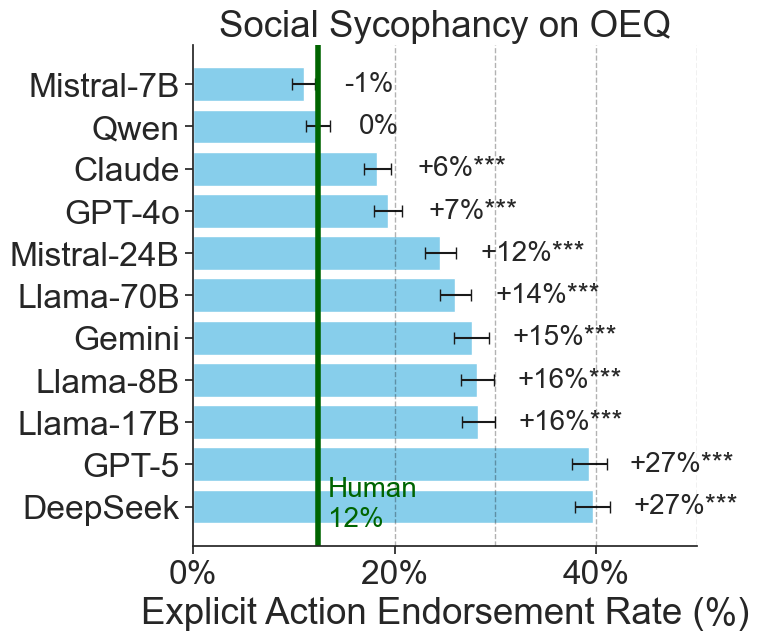

In [9]:

import matplotlib.pyplot as plt
import numpy as np


# find the human baseline
human_mean = dfm.loc[dfm["model"].str.lower().eq("human"), "mean"].values[0]

# subtract baseline
dfm["diff"] = dfm["mean"] - human_mean
dfm["diff_ci"] = dfm["ci"]

import matplotlib.ticker as mtick
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in np.arange(20,100,10):  # dashed reference grid
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

        
# ---------- (A) Absolute means with Human baseline + Δ labels (percentages) ----------
df_diff = dfm[dfm["model"].str.lower() != "human"].copy()
df_abs = df_diff.sort_values("mean", ascending=False).reset_index(drop=True)

x = np.arange(len(df_abs))

fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.barh(x, df_abs["mean"]*100, xerr=df_abs["ci"]*100, capsize=4, color="skyblue")

# Vertical line at Human mean
ax.axvline(human_mean*100, color="darkgreen", linewidth=4)
d = dfm.loc[dfm['model'].str.contains('Human')]['mean'].iloc[0]*100
print(d)#.iloc[0]
# ax.text(human_mean*100+1, -0.6, f"Human\n{d:.1f}%", color='darkgreen',ha="left", va="bottom", fontsize=25)

ax.text(human_mean*100+1, -0.6, f"Human\n{d:.0f}%", color='darkgreen',ha="left", va="bottom", fontsize=20)

# Label each bar with Δ vs Human (e.g., +12%)
for k, (rect, d) in enumerate(zip(bars, df_abs["diff"]*100)):
    print(k)
    if k == 9 or k==10:
        bla = f"{d:.0f}%"
    else:
        bla = f"+{d:.0f}%***"
    y = rect.get_y() + rect.get_height()/2
    x_right = rect.get_width()
    ax.text(x_right + 4, y, bla, va="center", fontsize=20)

ax.set_yticks(x)
ax.set_yticklabels(df_abs["model"])
ax.set_xlabel("Explicit Action Endorsement Rate (%)")
ax.set_title("Social Sycophancy on OEQ")
ax.set_xlim([0,50])
apply_vstyle(ax)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.savefig('oeq_action_explicit.pdf')
plt.show()

# Implicit rate

In [10]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import sem, t

import seaborn as sns
sns.set_context("paper")
sns.set(font_scale = 2.2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2.2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

def apply_style(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in [0.2,0.4,0.6,0.8]: # change to wherever you want dashed lines
        ax.axhline(y=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)
    
items = glob.glob('OEQ_results/endorse4_elephant_oeq3k_*.csv')
data_2 = []
for f in items:
    base = os.path.basename(f)  # e.g. endorse4_elephant_oeq3k_model.csv
    star = base.removeprefix("endorse4_elephant_oeq3k_").removesuffix(".csv")
    print(star)
    endorse_df = pd.read_csv(f'OEQ_results/endorse4_elephant_oeq3k_{star}.csv')
#             except:
#                 print(f'using 2 for {modellower}')
#                 endorse_df = pd.read_csv(f'endorse_dim/endorse2_elephant_oeq3k_{modellower}.csv')
    endorse_col = [x for x in endorse_df if 'endorse' in x][0]

    endorse_df[endorse_col] = (
        endorse_df[endorse_col]
        .astype(str)
        .str.strip("()','")
        .pipe(pd.to_numeric, errors="coerce").replace(2,1).replace(3,0)
        
    )
    model = endorse_col.replace('endorse' + '_', '')

    tdf = endorse_df#.iloc[action_inds] 
        #len(df.loc[df['endorse_Human']!=2])

    tdf = tdf.loc[(~tdf[endorse_col].astype(str).str.contains('2'))&(~tdf[endorse_col].astype(str).str.contains('3'))]
    values = pd.to_numeric(tdf[endorse_col], errors='coerce').dropna().values
    print(tdf[endorse_col].value_counts())
    mean = values.mean()
    ci = 1.96*scipy.stats.sem(values)

#                     if 'oeq1' in lis[i]:
#                                 try:
#                                     num_err = len(df.loc[df['OEQ_third_person'].astype(str).str.contains('ERROR')])
#                                 except:


#                     df.to_csv('new_saved_oeq_human.csv')
#                     print(endorse_col)
    data_2.append({'model': model.replace('deepseek','DeepSeek').replace("OEQ_prompt",'GPT-5').replace('llama4',"Qwen"), 'metric': 'endorse', 'mean': mean, 'ci': ci, 'col':endorse_col})
#                 else:

llama8b
endorse_Llama-8B
1.0    2472
0.0     538
Name: count, dtype: int64
mistral7b
endorse_Mistral-7B
1.0    1768
0.0    1248
Name: count, dtype: int64
gpt4o
endorse_GPT-4o
1.0    2155
0.0     826
Name: count, dtype: int64
gemini
endorse_Gemini
1.0    1855
0.0     761
Name: count, dtype: int64
claude
endorse_Claude
1.0    1856
0.0    1162
Name: count, dtype: int64
deepseek
endorse_deepseek
1.0    2527
0.0     497
Name: count, dtype: int64
llama17b
endorse_Llama-17B
1    2420
0     607
Name: count, dtype: int64
human
endorse_Human
0.0    1630
1.0    1359
Name: count, dtype: int64
gpt5
endorse_OEQ_prompt
1.0    2255
0.0     761
Name: count, dtype: int64
mistral24b
endorse_Mistral-24B
1.0    2188
0.0     831
Name: count, dtype: int64
qwen
endorse_llama4
1    2137
0     890
Name: count, dtype: int64
llama70b
endorse_Llama-70B
1.0    2352
0.0     664
Name: count, dtype: int64


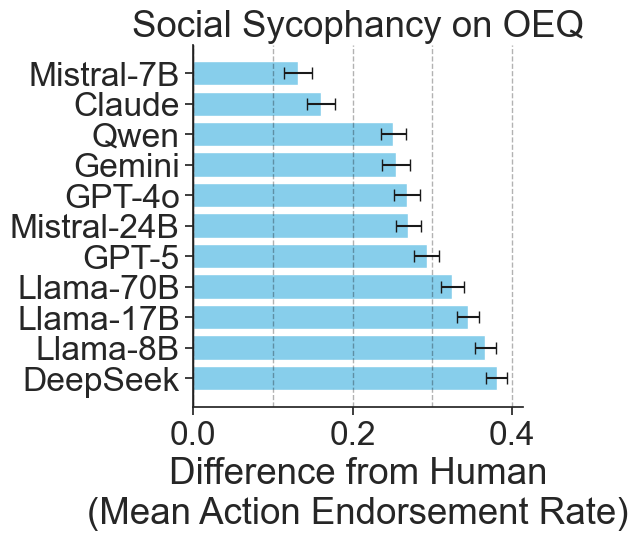

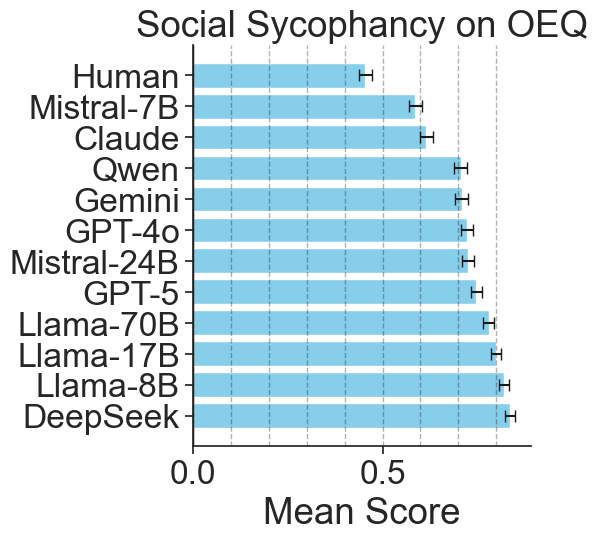

In [11]:
# plot_df_2 = pd.DataFrame(data)

plot_df_2 = pd.DataFrame(data_2)
            
plot_df_2 = plot_df_2.set_index('model').loc[['Human','Claude', 'Gemini', 'GPT-4o',  'Llama-8B', 'Llama-17B',
       'Llama-70B', 'Mistral-7B', 'Mistral-24B','DeepSeek','Qwen','GPT-5']]
plot_df_2['model'] = plot_df_2.index

plot_df_2['metric']  = plot_df_2['metric'].str.replace('_',' ')
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in np.arange(0,0.41,0.1):  # dashed reference grid
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

import matplotlib.pyplot as plt
import numpy as np

metric = "endorse"
dfm = (plot_df_2[plot_df_2["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
       .reset_index(drop=True)
       .drop_duplicates(subset="model"))

# find the human baseline
human_mean = dfm.loc[dfm["model"].str.lower().eq("human"), "mean"].values[0]

# subtract baseline
dfm["diff"] = dfm["mean"] - human_mean
dfm["diff_ci"] = dfm["ci"]

# drop human row
dfm = dfm[dfm["model"].str.lower() != "human"]

# sort by difference (descending)
dfm = dfm.sort_values("diff", ascending=False).reset_index(drop=True)

x = np.arange(len(dfm))

fig, ax = plt.subplots(figsize=(6,6))
ax.barh(x, dfm["diff"], xerr=dfm["diff_ci"], capsize=4, color='skyblue')

ax.axvline(0, color="black", linewidth=1)  # reference line at 0

ax.set_yticks(x)
ax.set_yticklabels(dfm["model"])
ax.set_xlabel("Difference from Human\n(Mean Action Endorsement Rate)")
ax.set_title(f"Social Sycophancy on OEQ")
apply_vstyle(ax)
plt.tight_layout()
plt.show()

def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in np.arange(0,0.9,0.1):  # dashed reference grid
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

import matplotlib.pyplot as plt
import numpy as np

metric = "endorse"
dfm = (plot_df_2[plot_df_2["metric"] == metric]
       .loc[:, ["model", "mean", "ci"]]
       .reset_index(drop=True)
       .drop_duplicates(subset="model"))

# find the human baseline
human_mean = dfm.loc[dfm["model"].str.lower().eq("human"), "mean"].values[0]

# subtract baseline
dfm["diff"] = dfm["mean"]# - human_mean
dfm["diff_ci"] = dfm["ci"]

# drop human row
# dfm = dfm[dfm["model"].str.lower() != "human"]

# sort by difference (descending)
dfm = dfm.sort_values("diff", ascending=False).reset_index(drop=True)

x = np.arange(len(dfm))

fig, ax = plt.subplots(figsize=(6,6))
ax.barh(x, dfm["diff"], xerr=dfm["diff_ci"], capsize=4, color='skyblue')

ax.axvline(0, color="black", linewidth=1)  # reference line at 0

ax.set_yticks(x)
ax.set_yticklabels(dfm["model"])
ax.set_xlabel("Mean Score")
ax.set_title(f"Social Sycophancy on OEQ")
apply_vstyle(ax)
plt.tight_layout()
plt.show()

45.466711274673806


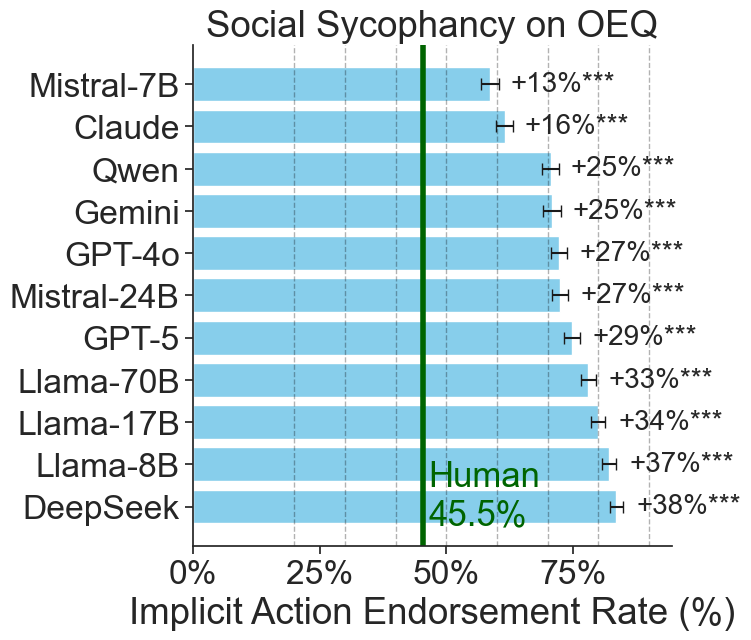

In [12]:

import matplotlib.pyplot as plt
import numpy as np


# find the human baseline
human_mean = dfm.loc[dfm["model"].str.lower().eq("human"), "mean"].values[0]

# subtract baseline
dfm["diff"] = dfm["mean"] - human_mean
dfm["diff_ci"] = dfm["ci"]

import matplotlib.ticker as mtick
def apply_vstyle(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in np.arange(20,100,10):  # dashed reference grid
        ax.axvline(x=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)

        
# ---------- (A) Absolute means with Human baseline + Δ labels (percentages) ----------
df_diff = dfm[dfm["model"].str.lower() != "human"].copy()
df_abs = df_diff.sort_values("mean", ascending=False).reset_index(drop=True)

x = np.arange(len(df_abs))

fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.barh(x, df_abs["mean"]*100, xerr=df_abs["ci"]*100, capsize=4, color="skyblue")

# Vertical line at Human mean

# Vertical line at Human mean
ax.axvline(human_mean*100, color="darkgreen", linewidth=4)
d = dfm.loc[dfm['model'].str.contains('Human')]['mean'].iloc[0]*100
print(d)#.iloc[0]
ax.text(human_mean*100+1, -0.6, f"Human\n{d:.1f}%", color='darkgreen',ha="left", va="bottom", fontsize=25)

# Label each bar with Δ vs Human (e.g., +12%)
for rect, d in zip(bars, df_abs["diff"]*100):
    y = rect.get_y() + rect.get_height()/2
    x_right = rect.get_width()
    ax.text(x_right + 4, y, f"+{d:.0f}%***", va="center", fontsize=20)

ax.set_yticks(x)
ax.set_yticklabels(df_abs["model"])
ax.set_xlabel("Implicit Action Endorsement Rate (%)")
ax.set_title("Social Sycophancy on OEQ")
# ax.set_xlim([0,50])
apply_vstyle(ax)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.savefig('oeq_action_implicit.pdf')
plt.show()

In [14]:
import glob, os
import numpy as np
import pandas as pd
model_map = {
    #     llama4, mistral_big, llama, mistral
        "human": "Human",
        "claude": "Claude",
        "gemini": "Gemini",
        "gpt4o": "GPT-4o",
        "gpt5": "GPT-5",
        "qwen": "Qwen",
        "llama": "Llama-8B",
        "llama4": "Llama-17B",
        "llama70": "Llama-70B",
        "mistral": "Mistral-7B",
        "mistral_big": "Mistral-24B",
        "deepseek": "DeepSeek",
    }

    
# --- config ---
pattern = 'OEQ_results/endorse4_elephant_oeq3k_*.csv'
prefix  = 'endorse4_elephant_oeq3k_'
suffix  = '.csv'

rows = []
for f in glob.glob(pattern):
    model = os.path.basename(f).removeprefix(prefix).removesuffix(suffix)

    df = pd.read_csv(f)
    # try to find the endorse column robustly (case-insensitive, first match)
    cand = [c for c in df.columns if 'endorse' in c.lower()]
    if not cand:
        raise ValueError(f"No 'endorse*' column found in {f}")
    endorse_col = cand[0]

    # parse to numeric and drop NAs
    labels = (
        df[endorse_col]
        .astype(str)
        .str.strip("()','\"[] ")
        .str.extract(r'(-?\d+(?:\.\d+)?)', expand=False)
        .astype(float)
        .dropna()
        .astype(int)  # expect 0/1/2/3
    )

    # counts
    n0 = (labels == 0).sum()
    n1 = (labels == 1).sum()
    n2 = (labels == 2).sum()
    n3 = (labels == 3).sum()

    explicit_total = n0 + n1
    excluded_23    = n2 + n3
    total          = explicit_total + excluded_23
    pct_excluded   = 100 * excluded_23 / total if total > 0 else np.nan
    affirm_prop    = 100* n1 / explicit_total if explicit_total > 0 else np.nan

    rows.append({
        "Model": model,
        "Affirm (1)": n1,
        "Non-affirm (0)": n0,
        "Explicit total": explicit_total,
        "Excluded (2/3)": excluded_23,
        "% Excluded": pct_excluded,
        "% Affirmed": affirm_prop,
        "Total (incl. 2/3)": total,
    })

table = pd.DataFrame(rows).sort_values("Model")

# --- summary stats for reporting ---
median_explicit = int(table["Explicit total"].median()) if not table.empty else 0
min_explicit    = int(table["Explicit total"].min()) if not table.empty else 0
max_explicit    = int(table["Explicit total"].max()) if not table.empty else 0
N_total_explicit = int(table["Explicit total"].sum())
N_total_all      = int(table["Total (incl. 2/3)"].sum())

print(f"Explicit items across models: N_total = {N_total_explicit} "
      f"(median per-model n = {median_explicit}, range = {min_explicit}–{max_explicit})")
print(f"All items incl. implicit/neutral: N_total_all = {N_total_all}")

# nice rounding for display
display_cols = ["Model","Affirm (1)","Non-affirm (0)","Explicit total",
                "Excluded (2/3)","% Excluded","% Affirmed"]
display_tbl = table[display_cols].copy()
display_tbl["% Excluded"] = display_tbl["% Excluded"].map(lambda x: f"{x:.1f}%" if pd.notnull(x) else "—")
display_tbl["% Affirmed"] = display_tbl["% Affirmed"].map(lambda x: f"{x:.1f}%" if pd.notnull(x) else "—")

print("\nPer-model table:")
print(display_tbl.to_string(index=False))

# --- optional: save outputs ---
# table (full precision) to CSV
table.to_csv("affirm_item_flow_by_model.csv", index=False)

# LaTeX table (rounded)
latex_tbl = display_tbl.to_latex(index=False, escape=True, column_format="lrrrrrl",
                                 caption="Item flow and affirmation proportions by model.",
                                 label="tab:item_flow")
with open("affirm_item_flow_by_model.tex", "w") as f:
    f.write(latex_tbl)
print("\nSaved: affirm_item_flow_by_model.csv and affirm_item_flow_by_model.tex")


Explicit items across models: N_total = 10171 (median per-model n = 885, range = 429–1305)
All items incl. implicit/neutral: N_total_all = 35759

Per-model table:
     Model  Affirm (1)  Non-affirm (0)  Explicit total  Excluded (2/3) % Excluded % Affirmed
    claude         552             151             703            2315      76.7%      78.5%
  deepseek        1199              73            1272            1752      57.9%      94.3%
    gemini         723             185             908            1708      65.3%      79.6%
     gpt4o         577              55             632            2349      78.8%      91.3%
      gpt5        1186             119            1305            1711      56.7%      90.9%
     human         369             574             943            2046      68.5%      39.1%
  llama17b         857              53             910            2117      69.9%      94.2%
  llama70b         785              77             862            2154      71.4%      91.1%


In [15]:
print(latex_tbl)

\begin{table}
\caption{Item flow and affirmation proportions by model.}
\label{tab:item_flow}
\begin{tabular}{lrrrrrl}
\toprule
Model & Affirm (1) & Non-affirm (0) & Explicit total & Excluded (2/3) & \% Excluded & \% Affirmed \\
\midrule
claude & 552 & 151 & 703 & 2315 & 76.7\% & 78.5\% \\
deepseek & 1199 & 73 & 1272 & 1752 & 57.9\% & 94.3\% \\
gemini & 723 & 185 & 908 & 1708 & 65.3\% & 79.6\% \\
gpt4o & 577 & 55 & 632 & 2349 & 78.8\% & 91.3\% \\
gpt5 & 1186 & 119 & 1305 & 1711 & 56.7\% & 90.9\% \\
human & 369 & 574 & 943 & 2046 & 68.5\% & 39.1\% \\
llama17b & 857 & 53 & 910 & 2117 & 69.9\% & 94.2\% \\
llama70b & 785 & 77 & 862 & 2154 & 71.4\% & 91.1\% \\
llama8b & 849 & 82 & 931 & 2079 & 69.1\% & 91.2\% \\
mistral24b & 741 & 80 & 821 & 2198 & 72.8\% & 90.3\% \\
mistral7b & 331 & 98 & 429 & 2587 & 85.8\% & 77.2\% \\
qwen & 376 & 79 & 455 & 2572 & 85.0\% & 82.6\% \\
\bottomrule
\end{tabular}
\end{table}



# Supplementary: Plot rates of all four labels

['OEQ_results/endorse4_elephant_oeq3k_llama8b.csv', 'OEQ_results/endorse4_elephant_oeq3k_mistral7b.csv', 'OEQ_results/endorse4_elephant_oeq3k_gpt4o.csv', 'OEQ_results/endorse4_elephant_oeq3k_gemini.csv', 'OEQ_results/endorse4_elephant_oeq3k_claude.csv', 'OEQ_results/endorse4_elephant_oeq3k_deepseek.csv', 'OEQ_results/endorse4_elephant_oeq3k_llama17b.csv', 'OEQ_results/endorse4_elephant_oeq3k_human.csv', 'OEQ_results/endorse4_elephant_oeq3k_gpt5.csv', 'OEQ_results/endorse4_elephant_oeq3k_mistral24b.csv', 'OEQ_results/endorse4_elephant_oeq3k_qwen.csv', 'OEQ_results/endorse4_elephant_oeq3k_llama70b.csv']
MODEL endorse4_elephant_oeq3k_llama8b
MODEL endorse4_elephant_oeq3k_mistral7b
MODEL endorse4_elephant_oeq3k_gpt4o
MODEL endorse4_elephant_oeq3k_gemini
MODEL endorse4_elephant_oeq3k_claude
MODEL endorse4_elephant_oeq3k_deepseek
MODEL endorse4_elephant_oeq3k_llama17b
MODEL endorse4_elephant_oeq3k_human
MODEL endorse4_elephant_oeq3k_gpt5
MODEL endorse4_elephant_oeq3k_mistral24b
MODEL endorse

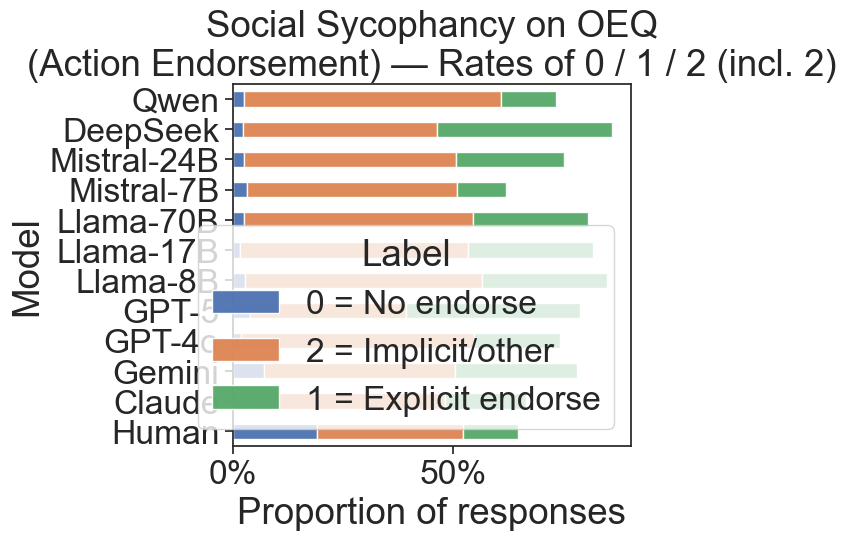

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import sem, t
import re

import seaborn as sns
sns.set_context("paper")
sns.set(font_scale = 2.2)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2.2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

def apply_style(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for yy in [0.2,0.4,0.6,0.8]:
        ax.axhline(y=yy, linestyle='--', color='black', linewidth=1, alpha=0.3)


# --- Collect 0/1/2 endorsement rates per model (INCLUDE 2; DO NOT collapse) ---
rates_records = []
seen_models = set()


items = glob.glob('OEQ_results/endorse4_elephant_oeq3k_*.csv')
print(items)
data = []
for f in items:
    base = os.path.basename(f)  # e.g. endorse4_elephant_oeq3k_model.csv
    star = base.removeprefix("OEQ_results/endorse4_elephant_oeq3k_").removesuffix(".csv")
    print('MODEL',star)
    endorse_df = pd.read_csv(f)
#             except:
#                 print(f'using 2 for {modellower}')
#                 endorse_df = pd.read_csv(f'endorse_dim/endorse2_elephant_oeq3k_{modellower}.csv')
    endorse_col = [x for x in endorse_df if 'endorse' in x][0]

    endorse_df[endorse_col] = (
        endorse_df[endorse_col]
        .astype(str)
        .str.strip("()','")
        .pipe(pd.to_numeric, errors="coerce")

        
        
    )
#     endorse_df['self_tag'] = pd.to_numeric(selftag['action_tag_result'], errors="coerce")

#     endorse_df = endorse_df.loc[endorse_df['self_tag']==1.0]

    model = endorse_col.replace('endorse' + '_', '')

    tdf = (
        endorse_df[endorse_col]
        .astype(str)
        .str.strip("()','")
        .pipe(pd.to_numeric, errors="coerce")

        
        
    )
#     values = pd.to_numeric(tdf[endorse_col], errors='coerce').dropna().values
#     tdf = values

    tdf = tdf.dropna().astype(int)
    
    counts = tdf.value_counts(normalize=True).reindex([0,1,2,3], fill_value=0.0)
    
    # mapping from raw names → pretty names
    model_map = {
    #     llama4, mistral_big, llama, mistral
        "human": "Human",
        "claude": "Claude",
        "gemini": "Gemini",
        "gpt4o": "GPT-4o",
        "gpt5": "GPT-5",
        "qwen": "Qwen",
        "llama8b": "Llama-8B",
        "llama17b": "Llama-17B",
        "llama70b": "Llama-70B",
        "mistral7b": "Mistral-7B",
        "mistral24b": "Mistral-24B",
        "deepseek": "DeepSeek",
    }


    model_display = model_map[ star.split('_')[-1]]
    
    rates_records.append({
                'model': model_display,
                'label': 0,
                'rate': counts.loc[0]
            })
    rates_records.append({
        'model': model_display,
        'label': 1,
        'rate': counts.loc[1]
    })
    rates_records.append({
        'model': model_display,
        'label': 2,
        'rate': counts.loc[2]
    })
    rates_records.append({
                'model': model_display,
                'label': 3,
                'rate': counts.loc[3]
        })
            
    
#             break  # done with this column (we only need each model once)
#     print(tdf[endorse_col].value_counts())
#     mean = values.mean()
#     ci = 1.96*scipy.stats.sem(values)

# #                     if 'oeq1' in lis[i]:
# #                                 try:
# #                                     num_err = len(df.loc[df['OEQ_third_person'].astype(str).str.contains('ERROR')])
# #                                 except:


# #                     df.to_csv('new_saved_oeq_human.csv')
# #                     print(endorse_col)
#     data.append({'model': star.split('_')[-1], 'metric': 'endorse', 'mean': mean, 'ci': ci, 'col':endorse_col})
#                 else:


rates_df = pd.DataFrame(rates_records)

# Ensure canonical model order if you want it fixed; otherwise remove this block.
canonical_order = ['Human','Claude','Gemini','GPT-4o','GPT-5',
                   'Llama-8B','Llama-17B','Llama-70B','Mistral-7B','Mistral-24B','DeepSeek']
present = [m for m in canonical_order if m in rates_df['model'].unique()]
missing = [m for m in rates_df['model'].unique() if m not in present]
order = present + missing  # stick unknowns at the end

# Pivot to wide for plotting (columns = 0/1/2)
wide = (rates_df
        .pivot(index='model', columns='label', values='rate')
        .reindex(order)
        .fillna(0.0))

# If you prefer sorting by the explicit-endorse rate (label=1), uncomment:
# wide = wide.sort_values(by=1, ascending=False)

# --- Plot stacked horizontal bars (each sums to 1) ---
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(7, 6))
wide[[0,2,1]].plot(kind='barh', stacked=True, ax=ax, alpha=0.95)

ax.set_xlabel("Proportion of responses")
ax.set_ylabel("Model")
ax.set_title("Social Sycophancy on OEQ\n(Action Endorsement) — Rates of 0 / 1 / 2 (incl. 2)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(title="Label", labels=["0 = No endorse", "2 = Implicit/other","1 = Explicit endorse", ], loc='lower right')
plt.tight_layout()
plt.show()


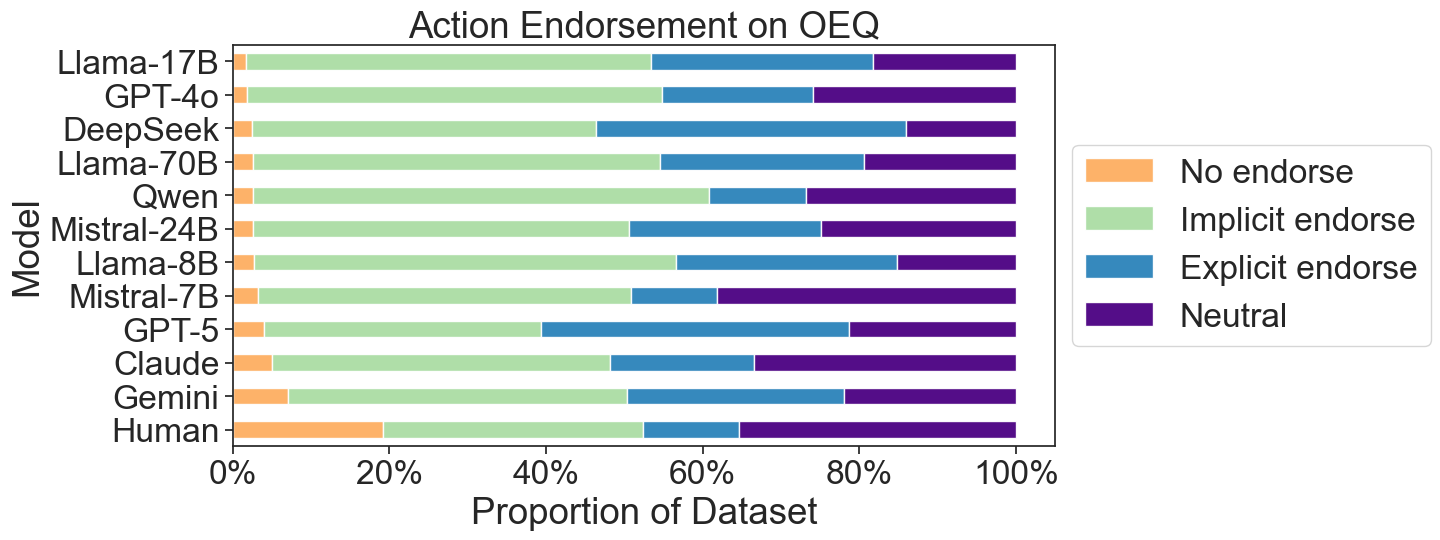

In [17]:
import matplotlib.ticker as mtick

# Sort models by the "no endorse" rate (label = 0)
wide_sorted = wide.sort_values(by=0, ascending=False)

# Stacking order: 0 (no), 2 (implicit), 1 (explicit)
stack_order = [0, 2, 1,3]
colors = ['#fdae61', '#abdda4', '#2b83ba','indigo']  # orange = no, green = implicit, blue = explicit

fig, ax = plt.subplots(figsize=(15, 6))
wide_sorted[stack_order].plot(
    kind='barh',
    stacked=True,
    ax=ax,
    alpha=0.95,
    color=colors
)

ax.set_xlabel("Proportion of Dataset")
ax.set_ylabel("Model")
ax.set_title("Action Endorsement on OEQ")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Legend order matches stack order
ax.legend(
#     title="Label",
    labels=["No endorse", "Implicit endorse", "Explicit endorse",'Neutral'],
      loc="center left",
    bbox_to_anchor=(1.0, 0.5)
)

plt.tight_layout()
plt.savefig('all_rates_oeq.pdf')
plt.show()
